In [1]:
import pandas as pd
import numpy as np
import gensim
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('model/GoogleNews-vectors-negative300.bin', binary=True)  

In [3]:
data = pd.read_csv("data/2021.csv")
data.shape

(158084, 22)

In [3]:
data = pd.read_csv("../Crimes_-_2001_to_Present.csv");
data = data[data['Year'] >= 2021]

In [4]:
data.shape

(161283, 22)

In [113]:
data['Date'][0]

Timestamp('2015-09-05 13:30:00')

In [19]:
data['Date'] = pd.to_datetime(data.Date) 
data['date'] = [d.date() for d in data['Date']] 
data['time'] = [d.time() for d in data['Date']] 
data['time'] = data['time'].astype(str) 
empty_list = [] 
for timestr in data['time'].tolist(): 
    ftr = [3600,60,1] 
    var = sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))]) 
    empty_list.append(var) 

data['seconds'] = empty_list

In [20]:
data['seconds']

6910067    48180
6927871    25140
6927960     1200
6932002    74820
6932007    72540
           ...  
7423480    41400
7423481    57600
7423482        0
7423483        0
7423484    36900
Name: seconds, Length: 161283, dtype: int64

In [17]:
data['time']

6910067    13:23:00
6927871    06:59:00
6927960    00:20:00
6932002    20:47:00
6932007    20:09:00
             ...   
7423480    11:30:00
7423481    16:00:00
7423482    00:00:00
7423483    00:00:00
7423484    10:15:00
Name: time, Length: 161283, dtype: object

In [6]:
monthList = []
for eachDate in data['date']:
    monthList.append(eachDate.month)
    
print(len(monthList))
data['month'] = monthList

161283


In [10]:
data['month'].iloc[100]

2

In [11]:
data['month']

6910067     1
6927871     1
6927960     1
6932002     1
6932007     1
           ..
7423480    10
7423481    10
7423482     1
7423483    10
7423484    10
Name: month, Length: 161283, dtype: int64

In [22]:
data['District'] = (data['District'] - data['District'].min())/(data['District'].max()-data['District'].min()) 

In [23]:
data['District'].iloc[0]

0.2

In [24]:
minV = min(data['seconds'])
maxV = max(data['seconds'])
normVals = []
for x in data['seconds']:
    normVals.append((x - minV)/(maxV - minV))
    
data['seconds'] = normVals

In [46]:
normVals[0]

0.5628908964558721

In [25]:
data['seconds'].iloc[0]

0.5580264072272412

In [16]:
data['seconds']

6910067    0.558026
6927871    0.291174
6927960    0.013899
6932002    0.866574
6932007    0.840167
             ...   
7423480    0.479500
7423481    0.667130
7423482    0.000000
7423483    0.000000
7423484    0.427380
Name: seconds, Length: 161283, dtype: float64

In [42]:
data['time'][0]

'13:30:00'

In [114]:
data['date'][0]

datetime.date(2015, 9, 5)

In [115]:
data['date'][0].month

9

In [27]:
data['PrimaryTypeNumeric']

KeyError: 'PrimaryTypeNumeric'

In [21]:
# # for eachCrime in tempNM:
# crimeType_numericVectors = {}
# crime_type_vectors = []
# for eachCrime in data['Primary Type']:
#     eachCrime = eachCrime.lower()
    
#     if eachCrime not in crimeType_numericVectors:
        
#         if eachCrime == 'deceptive practice':
#             crimeType_numericVectors[eachCrime] = model['fraud']
#         elif eachCrime == 'criminal damage':
#             crimeType_numericVectors[eachCrime] = model['vandalism']
#         elif eachCrime == 'motor vehicle theft':
#             crimeType_numericVectors[eachCrime] = model['carjacking']
#         elif eachCrime == 'criminal trespass':
#             crimeType_numericVectors[eachCrime] = model['trespass']
#         elif eachCrime == 'public indecency':
#             crimeType_numericVectors[eachCrime] = model['immodesty']
#         elif eachCrime == 'human trafficking':
#             crimeType_numericVectors[eachCrime] = model['trafficking']
#         else:
#             eachCrimeToConsider = eachCrime.replace('-', ' ')
#             tempVecs = []
#             newVecAvgd = ''
#             for word in eachCrimeToConsider.split(' '):
#                 word = word.strip()

#                 if word in model:
#                     tempVecs.append(model[word])
#                 else:
#                     print('SERIOUS ISSUE!!!! In word: ')

#             tempVec = tempVecs[0]
#             for vec in tempVecs[1:]:
#                 t2 = tempVec + vec
#                 tempVec = t2

#             newVecAvgd = tempVec / len(tempVecs)

#             crimeType_numericVectors[eachCrime] = newVecAvgd
        
#     crime_type_vectors.append(crimeType_numericVectors[eachCrime])

In [28]:
# for eachCrime in tempNM:
crimeType_numericVectors = {}
crime_type_vectors = []
crime_type_numeric = []
for eachCrime in data['Primary Type']:
    eachCrime = eachCrime.lower()
    eachCrime = eachCrime.strip()
    
    if eachCrime not in crimeType_numericVectors:
        
        if eachCrime == 'deceptive practice':
            crimeType_numericVectors[eachCrime] = model['fraud']
        elif eachCrime == 'criminal damage':
            crimeType_numericVectors[eachCrime] = model['vandalism']
        elif eachCrime == 'motor vehicle theft':
            crimeType_numericVectors[eachCrime] = model['carjacking']
        elif eachCrime == 'criminal trespass':
            crimeType_numericVectors[eachCrime] = model['trespass']
        elif eachCrime == 'public indecency':
            crimeType_numericVectors[eachCrime] = model['immodesty']
        elif eachCrime == 'human trafficking':
            crimeType_numericVectors[eachCrime] = model['trafficking']
        else:
            eachCrimeToConsider = eachCrime.replace('-', ' ')
            if eachCrimeToConsider == 'non   criminal':
                eachCrimeToConsider = 'non criminal'
            tempVecs = []
            newVecAvgd = ''
            for word in eachCrimeToConsider.split(' '):
                word = word.strip()

                if word != ' ':
                    if word in model:
                        tempVecs.append(model[word])
                    else:
                        print('SERIOUS ISSUE!!!! In word: ')
                        print('@@@', word)
                        print(eachCrime)
                        print(len(word))

            tempVec = tempVecs[0]
            for vec in tempVecs[1:]:
                t2 = tempVec + vec
                tempVec = t2

            newVecAvgd = tempVec / len(tempVecs)

            crimeType_numericVectors[eachCrime] = newVecAvgd
        
    crime_type_vectors.append(crimeType_numericVectors[eachCrime])
    crime_type_numeric.append(crimeType_numericVectors[eachCrime].mean())
    
minV = min(crime_type_numeric)
maxV = max(crime_type_numeric)
normVals = []
for x in crime_type_numeric:
    normVals.append((x - minV)/(maxV - minV))

data['PrimaryTypeNumeric'] = normVals

In [29]:
data['PrimaryTypeNumeric']

6910067    0.013105
6927871    0.450107
6927960    0.013105
6932002    0.000000
6932007    0.820827
             ...   
7423480    0.013105
7423481    0.641856
7423482    0.519478
7423483    0.430785
7423484    0.643583
Name: PrimaryTypeNumeric, Length: 161283, dtype: float32

In [66]:
data['PrimaryTypeNumeric'][0]

0.013104678

In [68]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,time,seconds,PrimaryTypeNumeric
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",2015-09-05,13:30:00,0.562891,0.013105
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",2015-09-04,11:30:00,0.479500,0.450107
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-09-01,00:01:00,0.000695,0.450107
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",2015-09-05,12:45:00,0.531619,0.000000
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",2015-09-05,13:00:00,0.542043,0.430785


In [34]:
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,date,time,seconds,month,PrimaryTypeNumeric
6910067,12260346,JE102126,2021-01-03 13:23:00,070XX S EGGLESTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,2021,01/16/2021 03:49:23 PM,41.766435,-87.635964,"(41.766435144, -87.635963997)",2021-01-03,13:23:00,0.558026,1,0.013105
6927871,12263464,JE105797,2021-01-03 06:59:00,080XX S YALE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,2021,01/16/2021 03:49:23 PM,41.748474,-87.630607,"(41.748473982, -87.630606588)",2021-01-03,06:59:00,0.291174,1,0.450107
6927960,12259990,JE101773,2021-01-03 00:20:00,056XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,2021,01/16/2021 03:49:23 PM,41.882224,-87.766076,"(41.88222427, -87.766076162)",2021-01-03,00:20:00,0.013899,1,0.013105
6932002,12260669,JE102509,2021-01-03 20:47:00,057XX S RACINE AVE,2022,NARCOTICS,POSSESS - COCAINE,STREET,True,False,...,2021,01/16/2021 03:49:23 PM,41.790069,-87.654769,"(41.79006908, -87.654768679)",2021-01-03,20:47:00,0.866574,1,0.000000
6932007,25702,JE102438,2021-01-03 20:09:00,068XX S STONY ISLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,2021,01/10/2021 03:51:53 PM,41.771062,-87.586271,"(41.771062488, -87.586270811)",2021-01-03,20:09:00,0.840167,1,0.820827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7423480,12514897,JE411920,2021-10-16 11:30:00,030XX N MILWAUKEE AVE,0460,BATTERY,SIMPLE,SCHOOL - PRIVATE BUILDING,False,False,...,2021,10/23/2021 04:47:36 PM,41.936657,-87.719851,"(41.936657276, -87.719850766)",2021-10-16,11:30:00,0.479500,10,0.013105
7423481,12514271,JE412448,2021-10-16 16:00:00,025XX W MARQUETTE RD,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,False,False,...,2021,10/23/2021 04:47:36 PM,41.771927,-87.686707,"(41.771926901, -87.686706738)",2021-10-16,16:00:00,0.667130,10,0.641856
7423482,12517486,JE416180,2021-01-02 00:00:00,114XX S FOREST AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,2021,10/23/2021 04:45:28 PM,41.686439,-87.615624,"(41.686439349, -87.615623747)",2021-01-02,00:00:00,0.000000,1,0.519478
7423483,12513899,JE412107,2021-10-16 00:00:00,063XX S KOLIN AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,2021,10/23/2021 04:47:36 PM,41.777411,-87.731273,"(41.777410704, -87.731273331)",2021-10-16,00:00:00,0.000000,10,0.430785


In [30]:
sub_data = data[['seconds', 'District', 'PrimaryTypeNumeric']] 

In [ ]:
# kmeans = KMeans(n_clusters=4, random_state=0).fit(sub_data)

In [31]:
km = KMeans(n_clusters=4) 
km.fit(sub_data) 
y = km.predict(sub_data) 
labels = km.labels_ 
sub_data['Clusters'] = y

/tmp/ipykernel_25153/107544561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['Clusters'] = y


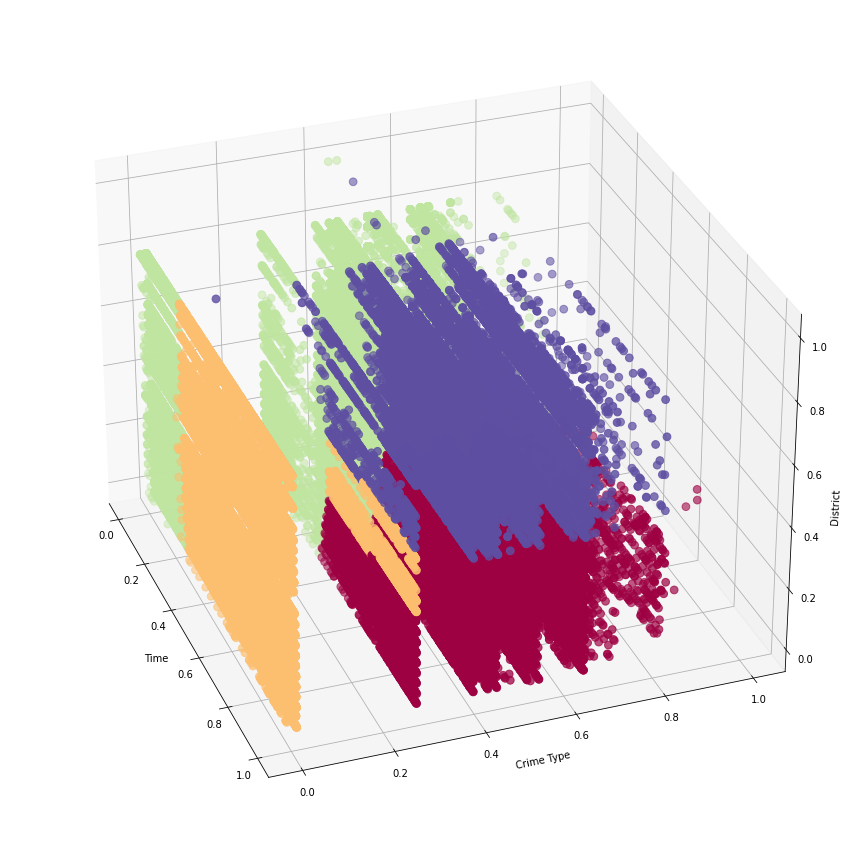

In [33]:
fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data['seconds']) 
y = np.array(sub_data['PrimaryTypeNumeric']) 
z = np.array(sub_data['District']) 
ax.set_xlabel('Time') 
ax.set_ylabel('Crime Type') 
ax.set_zlabel('District') 
ax.scatter(x,y,z, marker="o", c = sub_data["Clusters"], s=60, cmap="Spectral") 
# ax.view_init(elev=10., azim=90)
ax.view_init(azim=-20) 
# print(ax.azim) 
plt.show() 

In [35]:
data['IUCR'] = data.IUCR.str.extract('(\d+)', expand=True).astype(int)

In [37]:
sub_data1 = data[['IUCR', 'seconds', 'District']]
sub_data1['IUCR'] = (sub_data1['IUCR'] - sub_data1['IUCR'].min())/(sub_data1['IUCR'].max()-sub_data1['IUCR'].min())

/tmp/ipykernel_25153/3908906314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['IUCR'] = (sub_data1['IUCR'] - sub_data1['IUCR'].min())/(sub_data1['IUCR'].max()-sub_data1['IUCR'].min())


In [39]:
km = KMeans(n_clusters=4) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

/tmp/ipykernel_25153/3776958301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


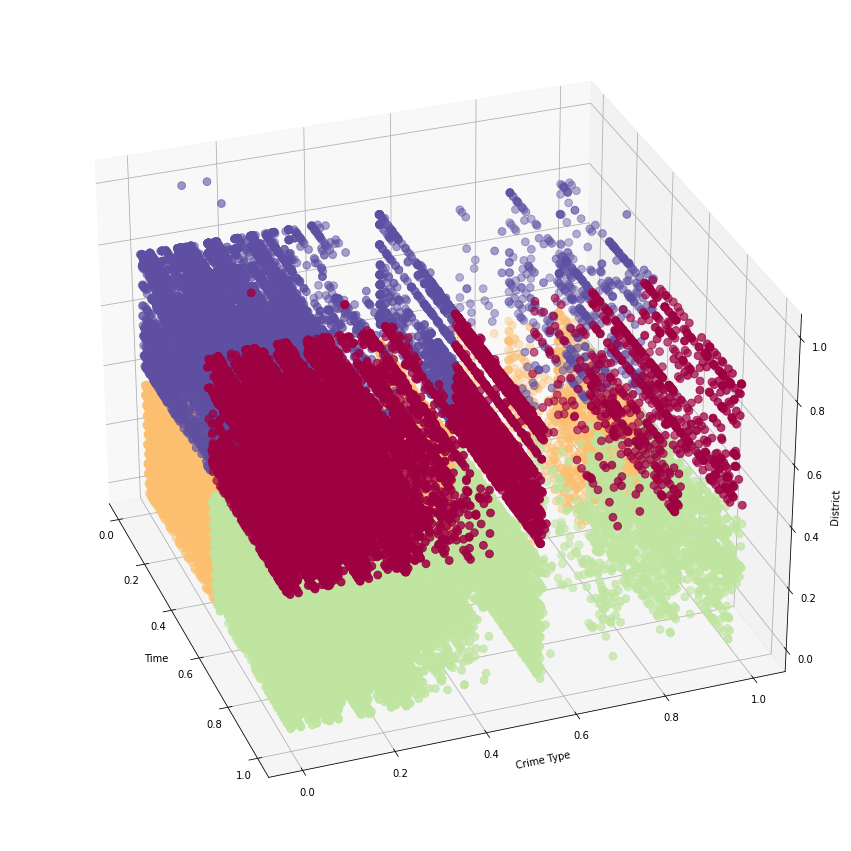

In [40]:
fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['seconds']) 
y = np.array(sub_data1['IUCR']) 
z = np.array(sub_data1['District']) 
ax.set_xlabel('Time') 
ax.set_ylabel('Crime Type') 
ax.set_zlabel('District') 
ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
# ax.view_init(elev=10., azim=90)
ax.view_init(azim=-20) 
# print(ax.azim) 
plt.show() 

In [38]:
sub_data1['IUCR']

6910067    0.089198
6927871    0.154676
6927960    0.089198
6932002    0.390316
6932007    0.015487
             ...   
7423480    0.084101
7423481    0.261517
7423482    0.220153
7423483    0.103705
7423484    0.250735
Name: IUCR, Length: 161283, dtype: float64

In [36]:
data['IUCR']

6910067     486
6927871     820
6927960     486
6932002    2022
6932007     110
           ... 
7423480     460
7423481    1365
7423482    1154
7423483     560
7423484    1310
Name: IUCR, Length: 161283, dtype: int64

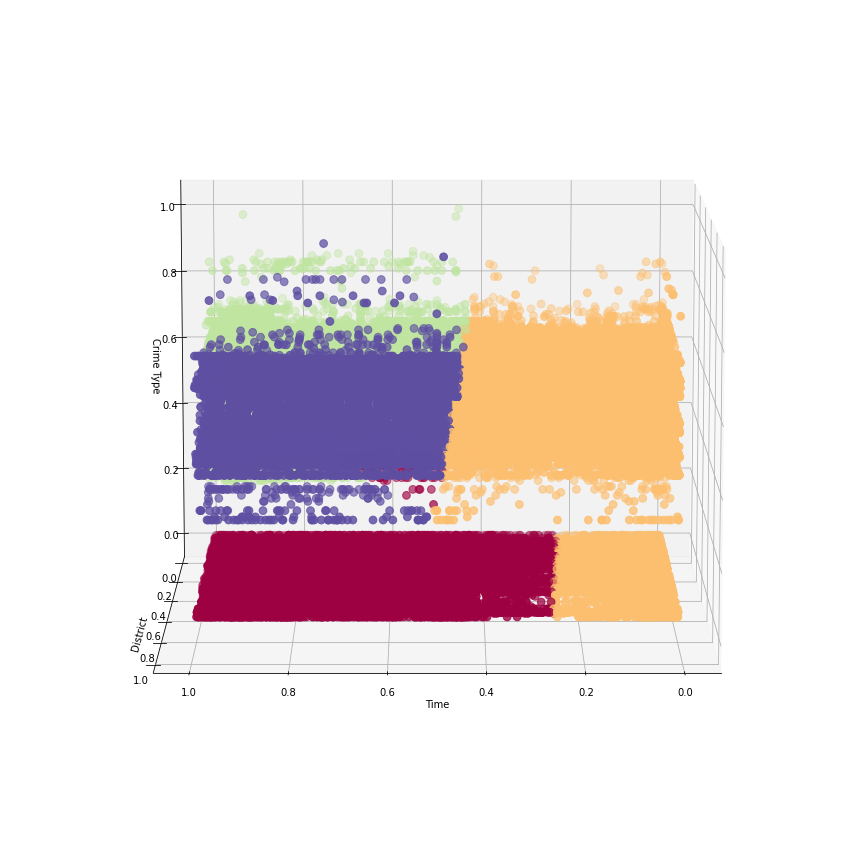

In [109]:
#### OLD OUTPUT ####

fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data['seconds']) 
y = np.array(sub_data['District']) 
z = np.array(sub_data['PrimaryTypeNumeric']) 
ax.set_xlabel('Time') 
ax.set_ylabel('District') 
ax.set_zlabel('Crime Type') 
ax.scatter(x,y,z, marker="o", c = sub_data["Clusters"], s=60, cmap="Spectral") 
ax.view_init(elev=10., azim=90)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

In [110]:
km = KMeans(n_clusters=5) 
km.fit(sub_data) 
y = km.predict(sub_data) 
labels = km.labels_ 
sub_data['Clusters'] = y

/tmp/ipykernel_4035/415921140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['Clusters'] = y


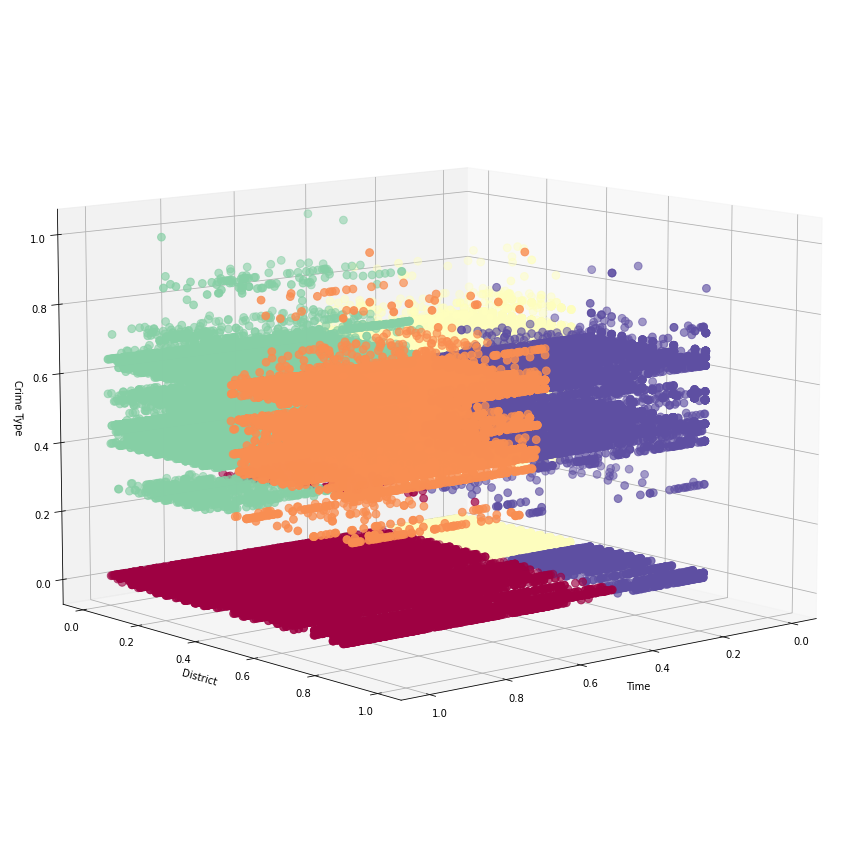

In [112]:
fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data['seconds']) 
y = np.array(sub_data['District']) 
z = np.array(sub_data['PrimaryTypeNumeric']) 
ax.set_xlabel('Time') 
ax.set_ylabel('District') 
ax.set_zlabel('Crime Type') 
ax.scatter(x,y,z, marker="o", c = sub_data["Clusters"], s=60, cmap="Spectral") 
ax.view_init(elev=10., azim=50)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

In [139]:
sub_data1 = data[['month', 'District', 'PrimaryTypeNumeric']] 

In [140]:
km1 = KMeans(n_clusters=6) 
km1.fit(sub_data1) 
y1 = km1.predict(sub_data1) 
labels1 = km1.labels_ 
sub_data1['Clusters'] = y1

/tmp/ipykernel_4035/1744492440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y1


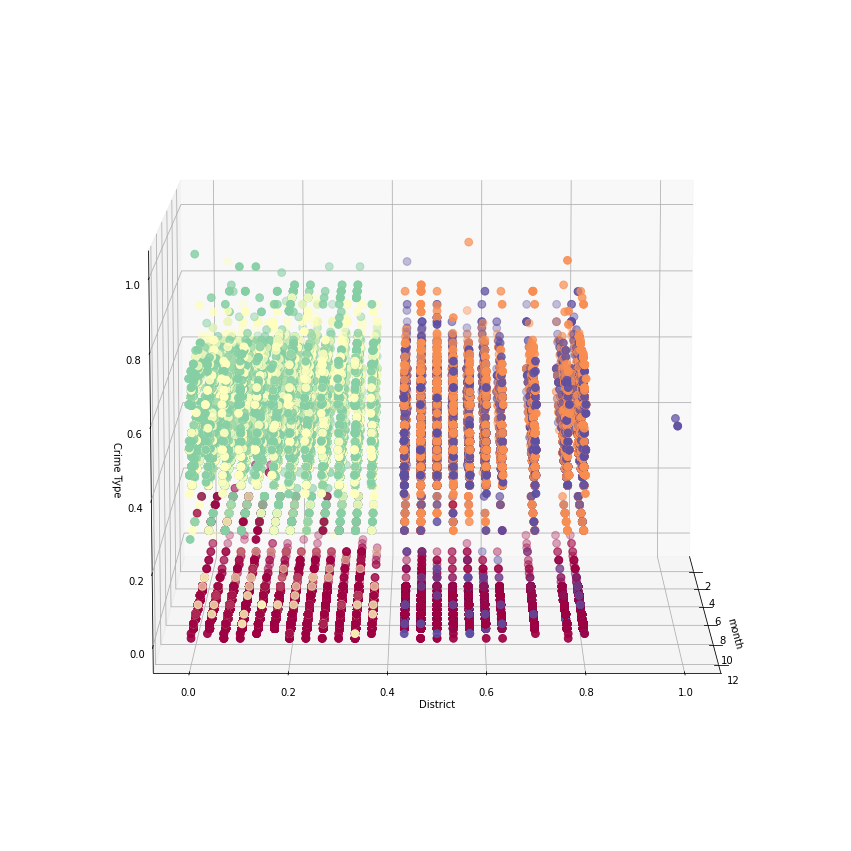

In [132]:
fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['month']) 
y = np.array(sub_data1['District']) 
z = np.array(sub_data1['PrimaryTypeNumeric']) 
ax.set_xlabel('month') 
ax.set_ylabel('District') 
ax.set_zlabel('Crime Type') 
ax.scatter(x,y,z, marker="o", c = sub_data["Clusters"], s=60, cmap="Spectral") 
ax.view_init(elev=10., azim=0)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

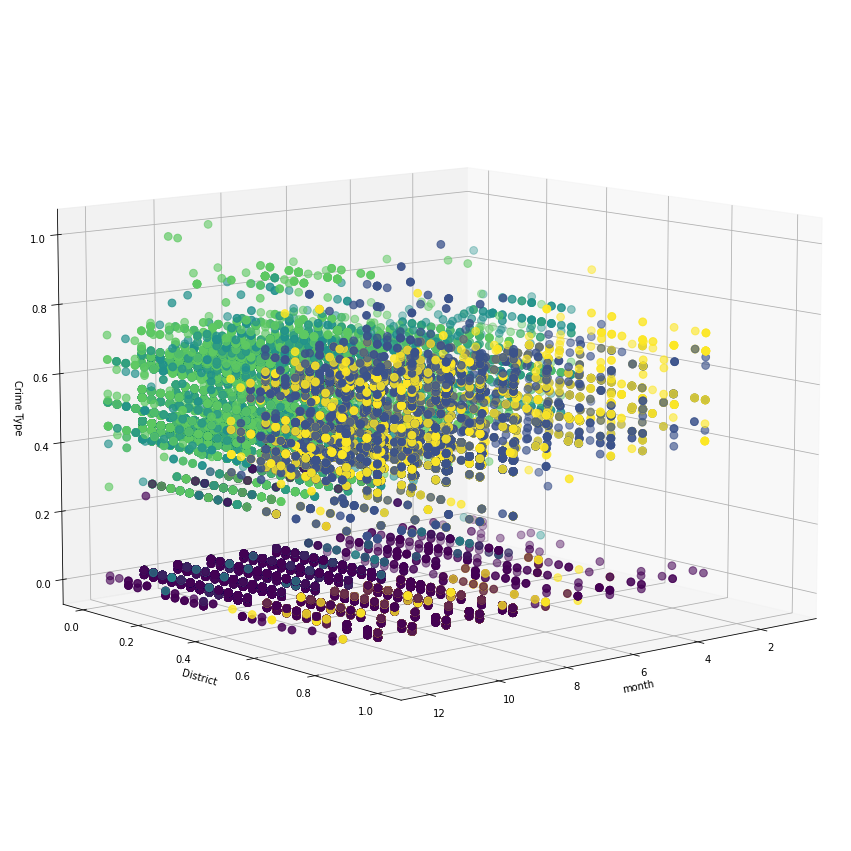

In [144]:
fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['month']) 
y = np.array(sub_data1['District']) 
z = np.array(sub_data1['PrimaryTypeNumeric']) 
ax.set_xlabel('month') 
ax.set_ylabel('District') 
ax.set_zlabel('Crime Type') 
ax.scatter(x,y,z, marker="o", c = sub_data["Clusters"], s=60, cmap="viridis") 
ax.view_init(elev=10., azim=50)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

In [145]:
km1 = KMeans(n_clusters=7) 
km1.fit(sub_data1) 
y1 = km1.predict(sub_data1) 
labels1 = km1.labels_ 
sub_data1['Clusters'] = y1

/tmp/ipykernel_4035/2836487005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y1


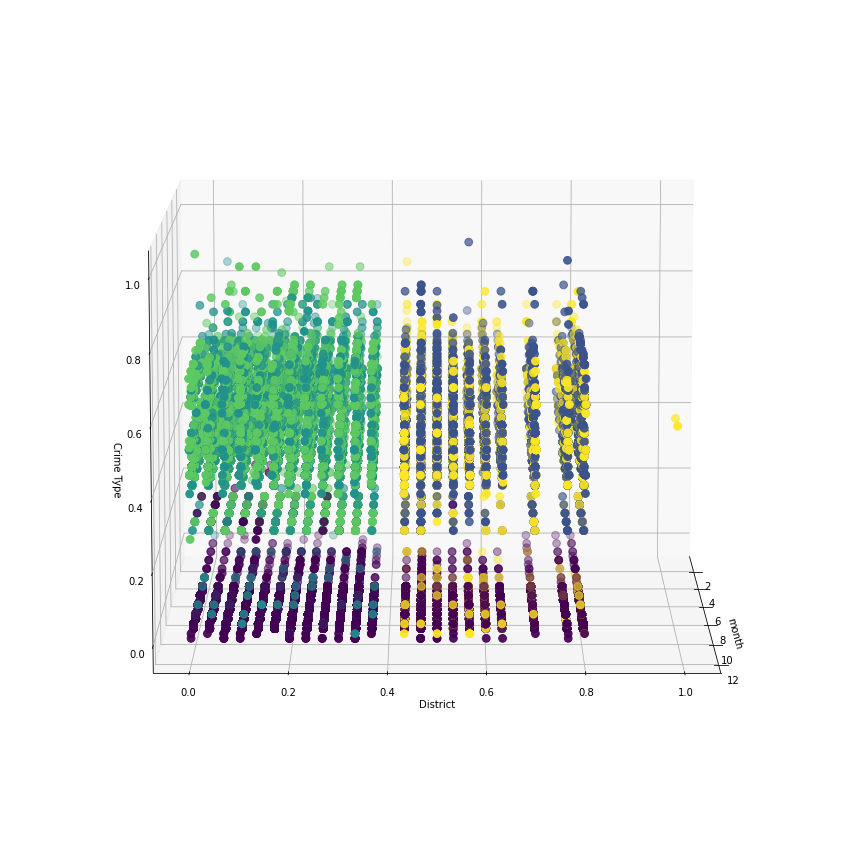

In [147]:
fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['month']) 
y = np.array(sub_data1['District']) 
z = np.array(sub_data1['PrimaryTypeNumeric']) 
ax.set_xlabel('month') 
ax.set_ylabel('District') 
ax.set_zlabel('Crime Type') 
ax.scatter(x,y,z, marker="o", c = sub_data["Clusters"], s=60, cmap="viridis") 
ax.view_init(elev=10., azim=0)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

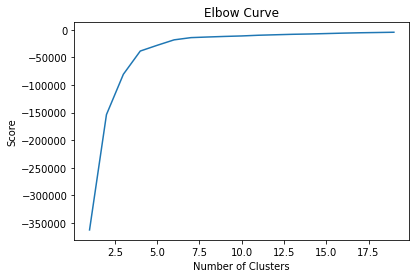

In [138]:
N = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in N] 
# kmeans 
score = [kmeans[i].fit(sub_data1).score(sub_data1) for i in range(len(kmeans))]
# score 
plt.plot(N,score) 
plt.xlabel('Number of Clusters') 
plt.ylabel('Score') 
plt.title('Elbow Curve') 
plt.show() 

In [64]:
a = 'non - criminal'
a = a.replace('-', '')
for w in a.split(' '):
    w = w.strip()
    print(w)
    if w == ' ':
        print('FOUND')

non

criminal


In [ ]:
data['PrimaryTypeNumeric']

In [25]:
crimeType_numericVectors

{'deceptive practice': array([-9.33837891e-03,  2.35351562e-01, -2.96630859e-02, -9.08203125e-02,
         8.88671875e-02,  2.09960938e-01,  4.24804688e-02, -6.44531250e-02,
         1.42578125e-01, -3.75000000e-01,  9.03320312e-02,  6.49414062e-02,
        -3.69140625e-01,  4.12109375e-01, -3.22265625e-01,  8.74023438e-02,
         1.90429688e-01, -5.88378906e-02, -1.61132812e-01, -5.24902344e-02,
        -5.24902344e-02, -3.75000000e-01,  4.90234375e-01,  7.42187500e-02,
         7.66601562e-02, -3.35937500e-01,  1.33789062e-01, -3.02734375e-01,
         1.39648438e-01,  4.93164062e-02, -1.47460938e-01, -2.84423828e-02,
        -2.46582031e-02, -3.29589844e-02,  2.55859375e-01,  5.37109375e-02,
        -1.78710938e-01, -7.61718750e-02,  2.59765625e-01,  1.90429688e-01,
        -2.38281250e-01, -2.55859375e-01, -3.57421875e-01, -1.80664062e-01,
        -1.44531250e-01, -3.45703125e-01, -1.44531250e-01,  8.59375000e-02,
        -1.99218750e-01, -6.64062500e-02,  2.05078125e-01,  1.7773

In [26]:
len(crimeType_numericVectors)

31

In [27]:
print(model['vandalism'])

[ 1.71875000e-01  3.65234375e-01  3.72314453e-03 -2.85156250e-01
 -7.22656250e-02 -1.17187500e-01  2.07031250e-01  3.51562500e-02
  4.10156250e-01  1.48437500e-01  1.39648438e-01  7.51953125e-02
 -2.08984375e-01  1.74804688e-01  4.90722656e-02 -2.45117188e-01
 -3.69140625e-01 -1.17187500e-01 -9.66796875e-02 -9.32617188e-02
  1.30859375e-01  1.64031982e-03  9.96093750e-02 -6.49414062e-02
 -3.98437500e-01 -9.61914062e-02  3.32031250e-01  4.07714844e-02
  2.00195312e-01  2.72216797e-02 -7.66601562e-02 -4.19921875e-01
 -2.00195312e-01 -9.91210938e-02  1.84570312e-01 -5.42968750e-01
 -1.80664062e-01 -9.37500000e-02  1.63085938e-01  3.86718750e-01
  2.44140625e-01  1.74804688e-01  2.13623047e-02 -1.45507812e-01
 -1.58203125e-01  7.42187500e-02 -4.02832031e-02 -1.32812500e-01
 -4.39453125e-01 -5.10253906e-02  1.20239258e-02  1.70898438e-01
 -1.97265625e-01  9.57031250e-02  2.81250000e-01  1.30859375e-01
 -8.15429688e-02 -4.15039062e-02 -2.28515625e-01  2.62451172e-03
  3.19824219e-02  2.77343

In [23]:
len(crime_type_numeric)

158084

In [24]:
crime_type_numeric[0]

-0.00347318

In [29]:
minV = min(crime_type_numeric)
maxV = max(crime_type_numeric)
normVals = []
for x in crime_type_numeric:
    normVals.append((x - minV)/(maxV - minV))

In [30]:
len(normVals)

158084

In [31]:
data['PrimaryTypeNumeric'] = normVals

In [32]:
data['PrimaryTypeNumeric']

0         0.519478
1         0.013105
2         0.713575
3         0.643583
4         0.430785
            ...   
158079    0.543702
158080    0.619302
158081    0.543702
158082    0.543702
158083    0.450107
Name: PrimaryTypeNumeric, Length: 158084, dtype: float32

In [ ]:
data['Date'] = pd.to_datetime(data.Date) 
data['date'] = [d.date() for d in data['Date']] 
data['time'] = [d.time() for d in data['Date']] 
data['time'] = data['time'].astype(str) empty_list = [] 
for timestr in data['time'].tolist(): 
    ftr = [3600,60,1] 
    var = sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))]) 
    empty_list.append(var) 
    data['seconds'] = empty_list

In [ ]:
# for eachCrime in tempNM:
crimeType_numericVectors = {}
crime_type_vectors = []
for eachCrime in data['Primary Type']:
    eachCrime = eachCrime.lower()
    if eachCrime not in crimeType_numericVectors:
        eachCrimeToConsider = eachCrime.replace('-', ' ')
        tempVecs = []
        newVecAvgd = ''
        for word in eachCrimeToConsider.split(' '):
            word = word.strip()
#             word = word.lower()
#             print(eachCrime)
#             print(word)

            if word in model:
                tempVecs.append(model[word])
            else:
                print('SERIOUS ISSUE!!!! In word: ')
        
        tempVec = tempVecs[0]
        for vec in tempVecs[1:]:
            t2 = tempVec + vec
            tempVec = t2


        newVecAvgd = tempVec / len(tempVecs)

        crimeType_numericVectors[eachCrime] = newVecAvgd
        
    crime_type_vectors.append(crimeType_numericVectors[eachCrime])

In [5]:
print(len(crimeType_numericVectors))
print(len(crime_type_vectors))
print(len(data['IUCR']))

31
158084
158084


In [7]:
print(crimeType_numericVectors['deceptive practice'])

[ 0.24406433  0.21289062 -0.02526855 -0.01184082  0.02453613  0.08342648
  0.06134033  0.01660156  0.04150391 -0.00611877  0.09643555  0.00952148
  0.04150391  0.0501709  -0.27197266  0.13842773  0.12915039  0.16320801
 -0.1484375  -0.10400391  0.15234375 -0.02941895 -0.14941406  0.15600586
 -0.0569458  -0.09332275 -0.08691406 -0.03778076 -0.02050781  0.04824829
 -0.08410645  0.04986572  0.24267578  0.04052734  0.11254883  0.12957764
  0.01977539  0.04284668  0.41601562 -0.28808594  0.07568359 -0.03063965
 -0.02737427 -0.07470703 -0.06500244  0.03845215 -0.1274414   0.08032227
  0.17578125  0.12451172  0.12817383  0.24072266 -0.00830078 -0.02075195
  0.15783691  0.20922852  0.08612061 -0.22949219  0.04613495 -0.06234741
 -0.1538086   0.12036133 -0.28125     0.08219147  0.0489502   0.09869385
  0.03580475  0.23266602 -0.04101562  0.10668945 -0.05587769  0.13146973
  0.15917969  0.08740234 -0.02920532  0.02856445  0.0168457  -0.08374023
  0.14257812  0.10302734 -0.08024597  0.05090332 -0

In [8]:
a = crimeType_numericVectors['deceptive practice']
type(a)

numpy.ndarray

In [9]:
a.mean()

0.0059808446

In [13]:
meanVals = []
for key in crimeType_numericVectors.keys():
    meanVals.append(crimeType_numericVectors[key].mean())
    print(key, ' | ', crimeType_numericVectors[key].mean())

deceptive practice  |  0.0059808446
battery  |  -0.023457922
sex offense  |  0.0041871713
criminal damage  |  -0.00089671294
assault  |  -0.0069735716
theft  |  -0.0062109884
narcotics  |  -0.023975117
other offense  |  0.0014052748
homicide  |  0.008419991
weapons violation  |  -0.013178866
motor vehicle theft  |  -0.010274619
criminal trespass  |  0.0020232843
burglary  |  0.0004665502
offense involving children  |  0.0021241596
robbery  |  -0.008239606
public peace violation  |  -0.005071372
interference with public officer  |  0.0006637057
stalking  |  -0.0019947942
criminal sexual assault  |  -0.0032652875
arson  |  0.0024205272
prostitution  |  0.004902881
intimidation  |  -0.0040815133
kidnapping  |  0.0052898154
liquor law violation  |  0.0019364997
concealed carry license violation  |  -0.00477976
obscenity  |  0.009257444
public indecency  |  0.0033957148
human trafficking  |  -0.008151149
non-criminal  |  -0.004234263
gambling  |  0.010710017
other narcotic violation  |  -0.

In [14]:
meanVals

[0.0059808446,
 -0.023457922,
 0.0041871713,
 -0.00089671294,
 -0.0069735716,
 -0.0062109884,
 -0.023975117,
 0.0014052748,
 0.008419991,
 -0.013178866,
 -0.010274619,
 0.0020232843,
 0.0004665502,
 0.0021241596,
 -0.008239606,
 -0.005071372,
 0.0006637057,
 -0.0019947942,
 -0.0032652875,
 0.0024205272,
 0.004902881,
 -0.0040815133,
 0.0052898154,
 0.0019364997,
 -0.00477976,
 0.009257444,
 0.0033957148,
 -0.008151149,
 -0.004234263,
 0.010710017,
 -0.008106899]

In [16]:
minV = min(meanVals)
maxV = max(meanVals)
print(minV)
print(maxV)

-0.023975117
0.010710017


In [ ]:
minV = min(meanVals)
maxV = max(meanVals)
normVals = []
for x in meanVals:
    normVals.append((x - minV)/(maxV - minV))


In [17]:
normVals = []
for x in meanVals:
    normVals.append((x - minV)/(maxV - minV))
print(normVals)

[0.86365414, 0.014911145, 0.8119412, 0.66536874, 0.49016806, 0.5121539, 0.0, 0.73173684, 0.93397677, 0.3112645, 0.39499626, 0.7495546, 0.7046727, 0.75246286, 0.45366728, 0.54501, 0.71035683, 0.63371015, 0.5970808, 0.7610074, 0.8325756, 0.5735484, 0.8437313, 0.7470525, 0.5534174, 0.9581212, 0.7891229, 0.45621756, 0.5691445, 1.0, 0.4574933]


In [18]:
normVals

[0.86365414,
 0.014911145,
 0.8119412,
 0.66536874,
 0.49016806,
 0.5121539,
 0.0,
 0.73173684,
 0.93397677,
 0.3112645,
 0.39499626,
 0.7495546,
 0.7046727,
 0.75246286,
 0.45366728,
 0.54501,
 0.71035683,
 0.63371015,
 0.5970808,
 0.7610074,
 0.8325756,
 0.5735484,
 0.8437313,
 0.7470525,
 0.5534174,
 0.9581212,
 0.7891229,
 0.45621756,
 0.5691445,
 1.0,
 0.4574933]

In [ ]:
sub_data['IUCR'] = (sub_data['IUCR'] - sub_data['IUCR'].min())/(sub_data['IUCR'].max()-sub_data['IUCR'].min()) sub_data['Ward'] = (sub_data['Ward'] - sub_data['Ward'].min())/(sub_data['Ward'].max()-sub_data['Ward'].min()) sub_data['District'] = (sub_data['District'] - sub_data['District'].min())/(sub_data['District'].max()-sub_data['District'].min()) 

In [1]:
print(crimeType_numericVectors)

NameError: name 'crimeType_numericVectors' is not defined

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(crime_type_vectors, data['IUCR'])

In [17]:
kmeans.labels_

array([1, 2, 1, ..., 1, 1, 0], dtype=int32)

In [20]:
kmeans.labels_[0]

1

In [18]:
len(kmeans.labels_)

158084

In [6]:
label_counts = {}
for label in kmeans.labels_:
    if label in label_counts:
        label_counts[label] = int(label_counts[label]) + 1
    else:
        label_counts[label] = 1
        
print(label_counts)

NameError: name 'kmeans' is not defined

In [28]:
print(data.iloc[0])

ID                                            12262230
Case Number                                   JE103740
Date                                        2021-01-03
Block                               015XX N WIELAND ST
IUCR                                              1152
Primary Type                        DECEPTIVE PRACTICE
Description                      ILLEGAL USE CASH CARD
Location Description    ATM (AUTOMATIC TELLER MACHINE)
Arrest                                           False
Domestic                                         False
Beat                                              1821
District                                            18
Ward                                              27.0
Community Area                                     8.0
FBI Code                                            11
X Coordinate                                       NaN
Y Coordinate                                       NaN
Year                                              2021
Updated On

In [33]:
#https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/
print(data.iloc[0, [2,4,5]])

Date                    2021-01-03
IUCR                          1152
Primary Type    DECEPTIVE PRACTICE
Name: 0, dtype: object
